In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow
from tensorflow import keras
#from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
''' reading fashion mnist data from tensorflow ''' 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)


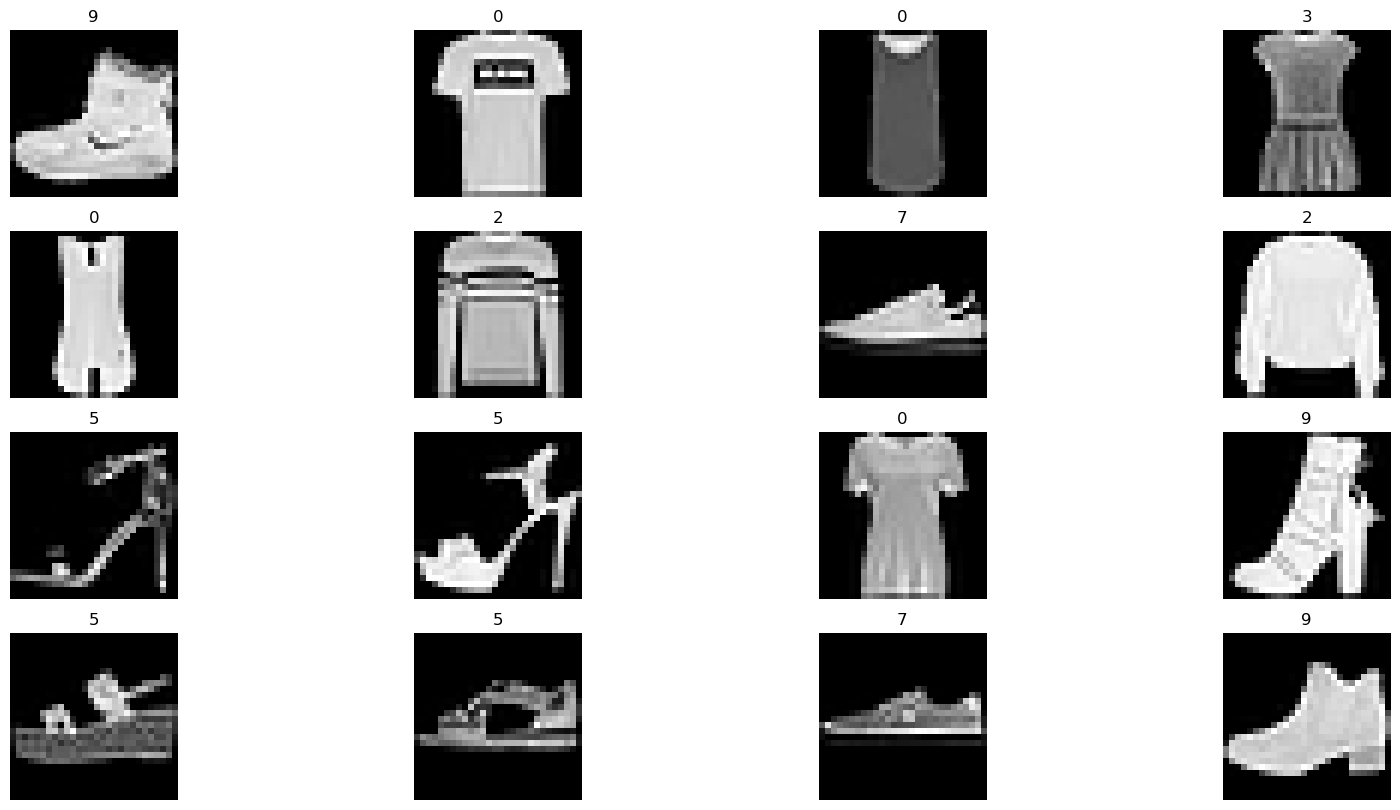

In [4]:
''' plotting some images '''
plt.figure(figsize=(20, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])

plt.show()

In [5]:
''' preprocessing steps ''' 

''' number of rows and columns '''
rows = X_train[0].shape[0]
cols = X_train[1].shape[0]

''' reshaping X_train and X_test '''
X_train = X_train.reshape(X_train.shape[0], rows, cols, 1)
X_test = X_test.reshape(X_test.shape[0], rows, cols, 1)

'''Storing the shape of a single image '''
inp_shape = (rows, cols, 1)

''' changing data type '''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

'''  rescaling ''' 
X_train = X_train / 255
X_test = X_test / 255

''' converting labels into to_categorical ''' 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

''' Number of classes '''
num_cls = y_test.shape[1]
num_pix = X_train.shape[1] * X_train.shape[2]

In [14]:
''' Model ''' 

''' container '''
model = Sequential()

''' Convolutional Layer '''
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inp_shape))
model.add(BatchNormalization())

''' Convolutional Layer '''
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

''' MaxPooling Layer ''' 
model.add(MaxPooling2D(pool_size=(2, 2)))

''' Dropout ''' 
model.add(Dropout(0.25))
model.add(Flatten())

''' Hidden Layers ''' 
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
''' Classification Layer ''' 
model.add(Dense(num_cls, activation='softmax'))

In [15]:
''' Compile the model ''' 
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [16]:
''' lets see how model looks like '''
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                        

In [17]:
''' training '''

batch_size = 128
epochs = 100

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(X_test, y_test))

Epoch 1/100
469/469 - 129s - loss: 0.4400 - accuracy: 0.8462 - val_loss: 0.9079 - val_accuracy: 0.6993 - 129s/epoch - 276ms/step
Epoch 2/100
469/469 - 124s - loss: 0.2944 - accuracy: 0.8951 - val_loss: 0.2493 - val_accuracy: 0.9074 - 124s/epoch - 264ms/step
Epoch 3/100
469/469 - 121s - loss: 0.2411 - accuracy: 0.9135 - val_loss: 0.2409 - val_accuracy: 0.9120 - 121s/epoch - 257ms/step
Epoch 4/100
469/469 - 121s - loss: 0.2123 - accuracy: 0.9217 - val_loss: 0.2439 - val_accuracy: 0.9102 - 121s/epoch - 258ms/step
Epoch 5/100
469/469 - 120s - loss: 0.1926 - accuracy: 0.9304 - val_loss: 0.2265 - val_accuracy: 0.9166 - 120s/epoch - 256ms/step
Epoch 6/100
469/469 - 113s - loss: 0.1747 - accuracy: 0.9362 - val_loss: 0.2308 - val_accuracy: 0.9184 - 113s/epoch - 241ms/step
Epoch 7/100
469/469 - 78s - loss: 0.1579 - accuracy: 0.9420 - val_loss: 0.2179 - val_accuracy: 0.9249 - 78s/epoch - 166ms/step
Epoch 8/100
469/469 - 77s - loss: 0.1443 - accuracy: 0.9466 - val_loss: 0.2514 - val_accuracy: 0.91

Epoch 65/100
469/469 - 67s - loss: 0.0219 - accuracy: 0.9922 - val_loss: 0.3404 - val_accuracy: 0.9329 - 67s/epoch - 142ms/step
Epoch 66/100
469/469 - 70s - loss: 0.0244 - accuracy: 0.9910 - val_loss: 0.3402 - val_accuracy: 0.9344 - 70s/epoch - 149ms/step
Epoch 67/100
469/469 - 67s - loss: 0.0246 - accuracy: 0.9910 - val_loss: 0.3507 - val_accuracy: 0.9348 - 67s/epoch - 144ms/step
Epoch 68/100
469/469 - 65s - loss: 0.0226 - accuracy: 0.9919 - val_loss: 0.3604 - val_accuracy: 0.9309 - 65s/epoch - 139ms/step
Epoch 69/100
469/469 - 65s - loss: 0.0248 - accuracy: 0.9909 - val_loss: 0.3653 - val_accuracy: 0.9334 - 65s/epoch - 139ms/step
Epoch 70/100
469/469 - 65s - loss: 0.0222 - accuracy: 0.9920 - val_loss: 0.3398 - val_accuracy: 0.9348 - 65s/epoch - 138ms/step
Epoch 71/100
469/469 - 75s - loss: 0.0240 - accuracy: 0.9916 - val_loss: 0.3091 - val_accuracy: 0.9337 - 75s/epoch - 159ms/step
Epoch 72/100
469/469 - 71s - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.3599 - val_accuracy: 0.9346 -

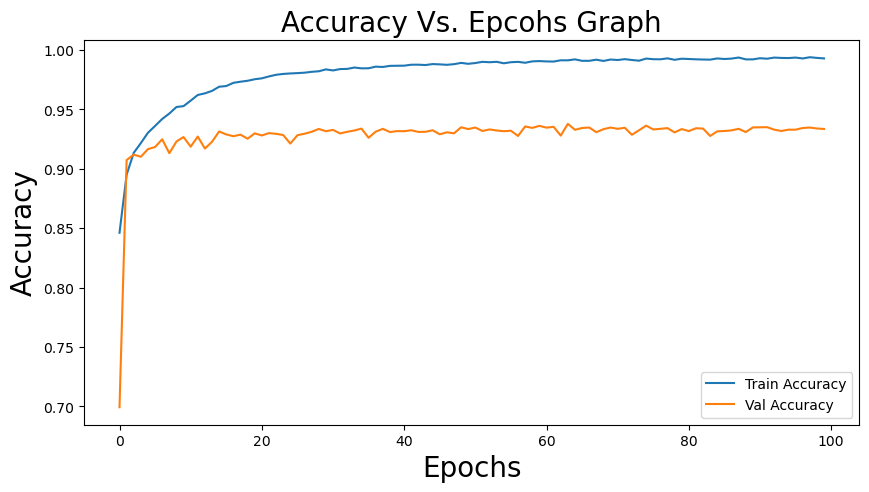

In [18]:
''' training accuracy and validation accuracy graph '''

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.legend()
plt.title("Accuracy Vs. Epcohs Graph", fontsize=20)
plt.legend()

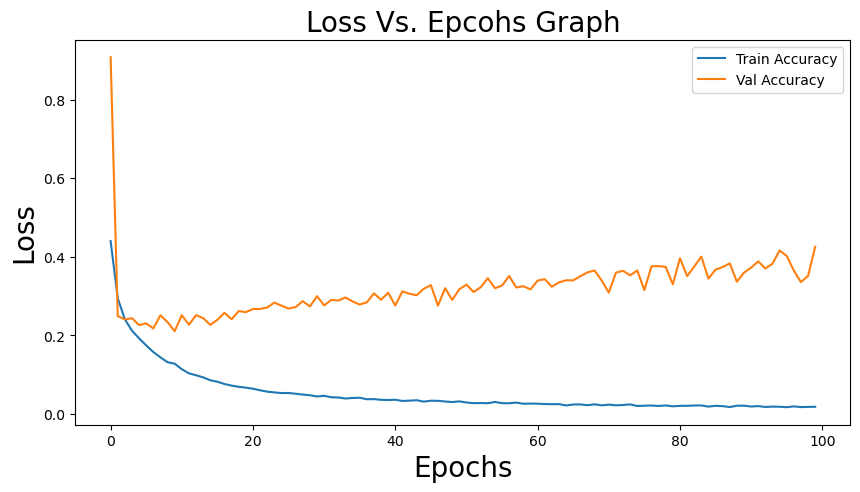

In [19]:
''' training loss and validation loss graph '''

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Val Accuracy')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title("Loss Vs. Epcohs Graph", fontsize=20)
plt.legend()

In [20]:
''' prediction '''
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 4s 12ms/step


In [21]:
''' resizing y_test '''
test = []
for x in y_test:
    if 1 in x:x = list(x)
    test.append(x.index(1))

In [22]:
y_test = np.array(test)

In [23]:
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  0.9336


cassification report:                precision    recall  f1-score   support

           0       0.89      0.89      0.89      1000
           1       1.00      0.99      0.99      1000
           2       0.90      0.90      0.90      1000
           3       0.93      0.93      0.93      1000
           4       0.88      0.92      0.90      1000
           5       0.99      0.99      0.99      1000
           6       0.83      0.79      0.81      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



<Axes: >

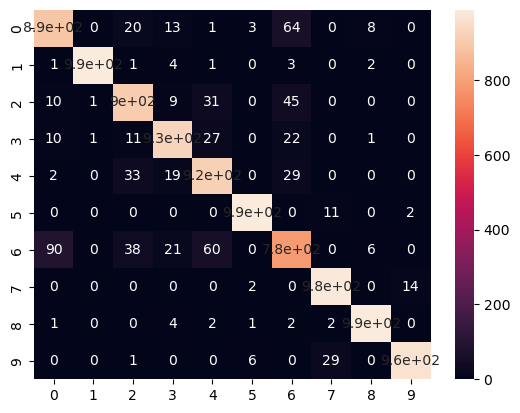

In [31]:
print("cassification report: ", classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred),annot=True)